## Classification
* 주어진 상황이 어느 라벨(class)에 해당하는지와 해당할 확률을 예측하는 것.
* 일반적으로 각 클래스에 해당할 확률을 예측한 후, 확룔이 가장 높은 클래스로 분류함

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

## Logistic Regression
* 연속형 숫자가 아닌 이진 타입/binary 타입인 데이터를 분석하기 위한 multi linear regression

### logistic Response Function / Logit
* 확률의 (0, 1) scale을, linear model 분석의 적합한 scale(∞, -∞)로 변환하는 함수
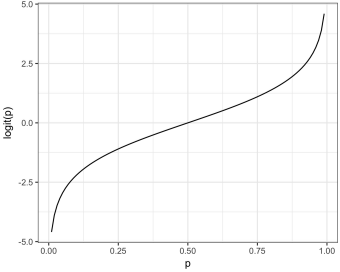

* logistic regression은 (∞, -∞)의 값을 계산하며, 이를 inverse logit / logistic response function에 적용하여   
주어진 데이터의 label이 '1'일 확률인 p를 구함
* sigmoid function / logistic function을 적용하며, 형태는 아래와 같음 ~ (1)
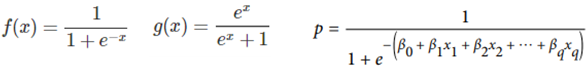
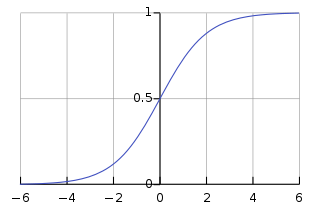


* 위 p에 대한 식을 일반적인 multiple linear model 형태로 변환하기 위해 odds 개념 적용
* odds: 실패 확률에 대한 성공 확률의 비 / 성공 확률이 실패 확률보다 몇 배 높은지 표현할 수 있음   
예) 어떤 사건의 성공 확률이 75%(0.75)면 실패 확률은 25%(0.25)이고 이때의 odds는 0.75/0.25 = 3.0

즉 odds의 계산식을 성공 확률 p로 표현하면 ~ (2)
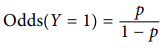

역으로 p를 odds를 사용하여 표현하면
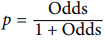

(1)의 p를 (2)에 대입하면 ~ (3)
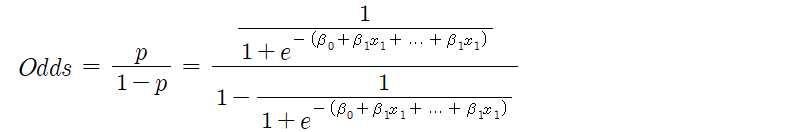
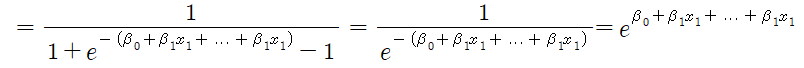

식 (3)의 양변에 로그를 취하면, multiple linear regression 모델의 형태가 됨 => logistic regression
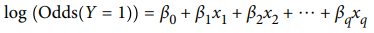

즉 기존 multiple linear regression 형태의 logistic regression 모델을 실행하면,   
결과값은 성공확룔 p의 logit 변환값(log odds 값)을 반환.   
p는 모델 수행 결과에 inverse logit 함수를 적용하여 구할 수 있음

p에는 cut-off / threshold를 두어, 이상이면 label은 '1' 그렇지 않으면 '0'으로 결정   
(defalut threshold = 0.5)

In [ ]:
# 데이터셋 분석

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('purchase.csv')
print(df.shape)
df.head()
# Y: Purchased - 1 (구매), 0 (구매 x)
# X: 성별, 나이, 수익(연봉)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
# 구매 여부에 따른 남녀 수
cond1 = df["Purchased"] == 1 # 구매한 사람
cond2 = df['Gender'] == 'Male' # 남자

print(f'구매한 남성: {len(df[cond1 & cond2])}, 여성: {len(df[cond1 & ~cond2])}')
print(f'구매하지 않은 남성: {len(df[~cond1 & cond2])}, 여성: {len(df[~cond1 & ~cond2])}')

구매한 남성: 66, 여성: 77
구매한지 않은 남성: 130, 여성: 127


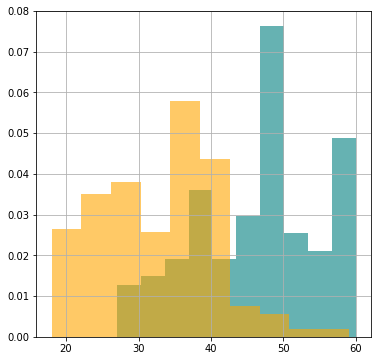

In [50]:
# 구매 여부에 따른 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

df[cond1]['Age'].hist(density=True, color='teal', alpha=0.6, ax = ax)
df[~cond1]['Age'].hist(density=True, color='orange', alpha=0.6, ax = ax)
plt.show()

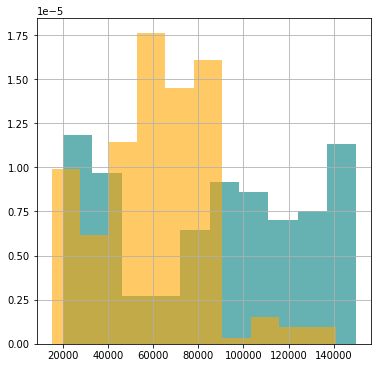

In [52]:
# 구매 여부에 따른 연봉 차이
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

df[cond1]['EstimatedSalary'].hist(density=True, color='teal', alpha=0.6, ax = ax)
df[~cond1]['EstimatedSalary'].hist(density=True, color='orange', alpha=0.6, ax = ax)
plt.show()

In [ ]:
# sklearn을 사용하여 logistic regression 구현

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [57]:
Xs = df[['Gender', 'Age', 'EstimatedSalary']]
Y = df['Purchased']

logit_reg = LogisticRegression().fit(Xs, Y)

In [58]:
print(logit_reg.coef_)
print(logit_reg.intercept_)
print(logit_reg.classes_)

[[-1.31721757e-10 -2.10415187e-09 -2.69301405e-06]]
[-2.2494472e-10]
[0 1]


In [61]:
sum(logit_reg.predict(Xs) == Y) / len(Y) # accuracy

0.6425

In [63]:
# 독립변수 간 스케일 차이로 학습 실패
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # (X - mean) / std
Xs = sc.fit_transform(Xs)
Xs

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [64]:
logit_reg.fit(Xs, Y)

LogisticRegression()

In [74]:
pd.DataFrame({'coef': logit_reg.coef_[0]},
            index = ['gender', 'age', 'salary'])

,coef
gender,0.146125
age,2.292050
salary,1.147433


In [66]:
sum(logit_reg.predict(Xs) == Y) / len(Y)

0.8525

### Prediction Values from Logistic Regression
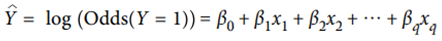
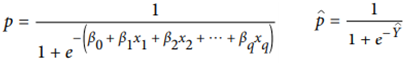

In [ ]:
# sklearn 모델의 logistic regression에서 predict 사용시 반환하는 값

In [ ]:
# predict(데이터셋)
# predict_log_proba(데이터셋) # -inf ~ + inf
# predict_proba(데이터셋) # p

In [69]:
logit_reg.predict_log_proba(Xs)[0]

array([-1.17783618e-03, -6.74466513e+00])

In [67]:
pred_logOdds = pd.DataFrame(logit_reg.predict_log_proba(Xs),
                           columns = logit_reg.classes_)
pred_logOdds.describe()

,0,1
count,400.000000,400.000000
mean,-0.832526,-1.931392
std,1.240442,1.765161
min,-6.193475,-6.969347
25%,-0.881405,-3.008570
50%,-0.317757,-1.301547
75%,-0.050624,-0.534777
max,-0.000941,-0.002045


In [70]:
logit_reg.predict_proba(Xs)[0]

array([0.99882286, 0.00117714])

In [71]:
pred_p = pd.DataFrame(logit_reg.predict_proba(Xs),
                     columns = logit_reg.classes_)
pred_p.describe()

,0,1
count,400.000000,400.000000
mean,0.642500,0.357500
std,0.337467,0.337467
min,0.002043,0.000940
25%,0.414200,0.049364
50%,0.727809,0.272191
75%,0.950636,0.585800
max,0.999060,0.997957


### Logistic regression에서 회귀계수의 의미
* logistic regression에서 계수는 해당 변수의 odds ratio에 log를 취한 값을 의미함


* odds ratio: 0dds 간 비율   
(binary factor variable X에 대한 odds ratio 예시)
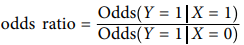
: (X=1일 때 Y=1일 Odds) / (X=0일 때 Y=1일 Odds) -> X=0일 때와 비교하여 X=1일 때 Y=1인 경우가 몇배 더 증가하는지


* 즉, 변수 Age의 계수가	2.3이라면, 나이 단위가 증가하면 어린 것보다 구매할 확률이 9.97(np.exp(2.3)) 정도 높아진다고 해석할 수 있음
* 계수의 양수/음수 여부로, 변수와 성공확률이 양의 상관관계 / 음의 상관관계를 가지는지 알 수 있음

### Logistic Regression 모델 및 변수 평가

In [ ]:
# statsmodels 패키지를 사용하여 모델을 구성하는 변수의 coef 평가

In [75]:
import statsmodels.api as sm

In [77]:
Xs = pd.DataFrame(Xs, columns = ['gender', 'age', 'salary'])

In [79]:
logit_reg_sm = sm.GLM(Y, Xs,
                      family = sm.families.Binomial()) # logistic regression 모델을 나타내는 parameter
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -166.71
Date:                Tue, 10 May 2022   Deviance:                       333.42
Time:                        11:10:51   Pearson chi2:                     605.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3752
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gender         0.0746      0.136      0.549      0.5

## Evaluationg Classification Models
### 혼동행렬 confusion matrix
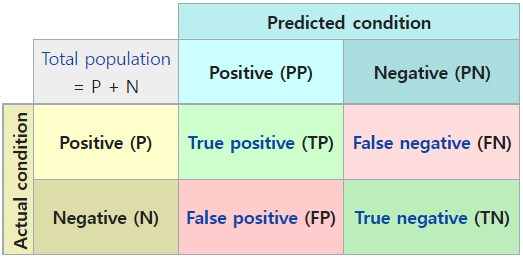
* 두가지 선택에 대해, 더 가치있다고 판단하는 일을 positive(1)로 취급함   
환자에 대한 Cancer/Non-Cancer - Cancer(1), Non-Cancer(0)   
기기에 대한 고장/정상 - 고장(1), 정상(0)
* 일반적으로 (1) case는 (0) case보다 적어, 모두 (0)으로 판단해도 정확도가 높은 경우 존재
* 그러나 (1)을 (1)로 제대로 판별하는게 더 중요한 상황이 많으므로 여러 지표를 고려해야 함

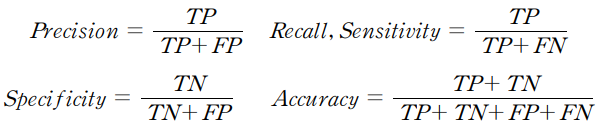
* 정밀도(precision, Positive Predictable Value): 모델이 양성으로 평가한 것 중 실제 양성의 비율
* 재현율(recall), 민감도(sensitivity): 실제 양성 중 모델이 양성으로 평가한 비율
* 특이도(specificity, True Negativity Rate): 실제 음성 중 모델이 음성으로 평가한 비율
* 정확도(accuracy): 전체 중 모델이 올바르게 평가한 비율


* 민감도. 특이도는 bio, medical 분야에서 / 정밀도, 재현율은 기계 학습, 딥러닝 모델 평가 지표로 주로 사용

In [ ]:
# confusion matrix 연산 (coding, sklearn, dmba)
# dmba 설치 명령어: conda install -c conda-forge dmba

In [82]:
# coding
true_y = Y == 1
pred_y = logit_reg.predict(Xs) == 1

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [85]:
tp = sum(true_y & pred_y)
fn = sum(true_y & ~pred_y)
fp = sum(~true_y & pred_y)
tn = sum(~true_y & ~pred_y)
conf_mat = [[tp, fn], [fp, tn]]
pd.DataFrame(conf_mat,
            index = ['true 구매', 'true 구매 x'],
            columns = ['model 구매', 'model 구매 x'])

,model 구매,model 구매 x
true 구매,104,39
true 구매 x,20,237


In [89]:
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary

In [87]:
confusion_matrix(Y, logit_reg.predict(Xs))

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[237,  20],
       [ 39, 104]], dtype=int64)

In [91]:
classificationSummary(Y, logit_reg.predict(Xs),
                     class_names = logit_reg.classes_)

Confusion Matrix (Accuracy 0.8525)

       Prediction
Actual   0   1
     0 237  20
     1  39 104


C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [98]:
# 평가 지표 계산
precision = tp / (tp + fp)
recall = tp / (tp + fn)
sensitivity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(precision, recall, sensitivity, accuracy)

0.8387096774193549 0.7272727272727273 0.9221789883268483 0.8525


### ROC Curve
* sensitivity와 specificity는. 하나가 증가하면 다른 하나는 감소하는 상충 관계를 가짐   
(이상적인 모델은 sensitivity와 specificity가 모두 높음)
* 둘의 관계를 2차원 그래프로 나타낸 것을 "Receiver Operating Characteristics curve(ROC curve)"라고 함
* 일반적으로, 우상향 그래프 모양을 위해 x축은 1-specificity, y축은 sensitivity 값을 가짐

In [ ]:
# sklearn을 사용하여 ROC Curve 그리기

In [99]:
from sklearn.metrics import roc_curve

In [100]:
logit_reg.predict_proba(Xs)[0]

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0.99882286, 0.00117714])

In [138]:
print(tpr[:5]) # (2) 민감도는 높아지고
print(1 - fpr[:5]) # (3) 특이도는 낮아짐(상충관계)
print(threshold[:5]) # (1) threshold 기준이 내려갈수록

[0.         0.00699301 0.12587413 0.12587413 0.16083916]
[1.         1.         1.         0.98832685 0.98832685]
[1.99795728 0.99795728 0.98070235 0.9762448  0.96858916]


C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'sensi')

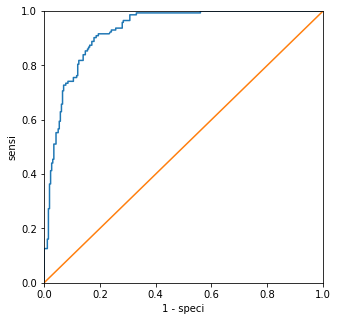

In [109]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label = 1)
# false positive rate: FP / (FP + TN) -> 1 - fpr: TN / (FP + TN): 특이도
# true positive rate: TP / (TP + FN): 민감도

roc_df = pd.DataFrame({'sensi': tpr, '1 - speci': fpr})

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
roc_df.plot(x = '1 - speci', y = 'sensi', legend = False, ax = ax)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.plot((0, 1), (0, 1))
ax.set_xlabel('1 - speci')
ax.set_ylabel('sensi')

In [138]:
print(tpr[:5]) # (2) 민감도는 높아지고
print(1 - fpr[:5]) # (3) 특이도는 낮아짐(상충관계)
print(threshold[:5]) # (1) threshold 기준이 내려갈수록

[0.         0.00699301 0.12587413 0.12587413 0.16083916]
[1.         1.         1.         0.98832685 0.98832685]
[1.99795728 0.99795728 0.98070235 0.9762448  0.96858916]


### AUC (Area Under ROC Curve)
* 그림으로 표현되는 ROC Curve를 점수 형태로 표현하기 위해 사용
* AUC = ROC Curve 아래 넓이( ~ 1)
* AUC가 클수록 모델의 분류 성능이 좋다고 판단하며, 모델이 완전히 랜덤으로 분류할 때(학습이 되지 않았을 때) AUC 기댓값은 0.5임

In [ ]:
# sklearn을 사용하여 AUC 계산하기

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


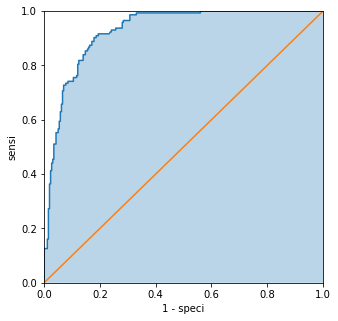

In [110]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label = 1)
# false positive rate: FP / (FP + TN) -> 1 - fpr: TN / (FP + TN): 특이도
# true positive rate: TP / (TP + FN): 민감도

roc_df = pd.DataFrame({'sensi': tpr, '1 - speci': fpr})

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
roc_df.plot(x = '1 - speci', y = 'sensi', legend = False, ax = ax)
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.plot((0, 1), (0, 1))
ax.set_xlabel('1 - speci')
ax.set_ylabel('sensi')

ax.fill_between(roc_df['1 - speci'], 0, roc_df['sensi'], alpha = 0.3)

plt.show()

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [115]:
auc(fpr, tpr)

0.9274441511795597

In [116]:
roc_auc_score(Y, logit_reg.predict_proba(Xs)[:, 1])

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9274441511795597

In [118]:
from sklearn.metrics import precision_recall_fscore_support

In [121]:
precision_recall_fscore_support(Y, logit_reg.predict(Xs),
                               labels = logit_reg.classes_)
# 각 클래스(0, 1)에 대한 정밀도, 재현율, f1 score
# f1-score: 2 * precision * recall / (precision + recall)

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(array([0.85869565, 0.83870968]),
 array([0.92217899, 0.72727273]),
 array([0.88930582, 0.77902622]),
 array([257, 143], dtype=int64))

In [ ]:
# class가 여러개 일 때 logistic regression

In [125]:
glasses = pd.read_csv('glass.txt', header = None)
glasses.columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
glasses

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass-type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [126]:
glasses['glass-type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [127]:
Xs = glasses[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]]
Y = glasses['glass-type']

In [128]:
glass_reg = LogisticRegression(multi_class='multinomial',
                              max_iter=300).fit(Xs, Y)

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
precision_recall_fscore_support(Y, glass_reg.predict(Xs),
                               labels=glass_reg.classes_)

C:\Users\user\anaconda3\envs\env_temp\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.61176471, 0.6       , 0.        , 0.75      , 0.57142857,
        0.89655172]),
 array([0.74285714, 0.67105263, 0.        , 0.46153846, 0.44444444,
        0.89655172]),
 array([0.67096774, 0.63354037, 0.        , 0.57142857, 0.5       ,
        0.89655172]),
 array([70, 76, 17, 13,  9, 29], dtype=int64))

In [137]:
glass_reg.coef_

array([[-2.93109904e-02, -6.76670564e-01,  1.48245662e+00,
        -1.96059025e+00,  8.53200241e-02, -2.64997045e-01,
         3.00461455e-01,  1.89585790e-03, -3.01533889e-01],
       [ 5.74797767e-02, -3.55236813e-01,  4.66634922e-01,
         4.06595659e-01,  9.85988377e-03,  6.48653669e-01,
         4.03686961e-01,  3.41904892e-01,  6.67183726e-01],
       [ 4.75362710e-03,  1.72242358e-01,  1.22284973e+00,
        -6.96750062e-01, -1.11305770e-01, -3.50759275e-01,
         3.94852993e-01, -1.69462199e-01,  2.74619588e-03],
       [ 2.22340366e-02, -7.35969449e-01, -8.27460430e-01,
         1.99834768e+00,  9.00733156e-02,  9.61251518e-01,
         1.46454999e-01, -1.05623956e-01, -5.14914152e-02],
       [-5.07882344e-02,  1.19100069e+00, -8.03590147e-01,
        -2.74332747e-01, -1.35930025e-01, -1.27618197e+00,
        -4.03605860e-01, -1.05859898e+00, -1.92845438e-01],
       [-4.36821569e-03,  4.04633777e-01, -1.54089070e+00,
         5.26729717e-01,  6.19825712e-02,  2.820331